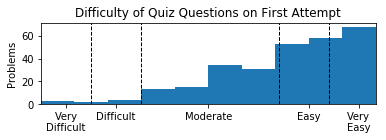

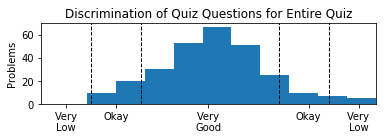

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas.io.json import json_normalize
import json
from natsort import natsorted, index_natsorted, order_by_index

with open('combined.json') as data_file:    
    data = json.load(data_file)  

df = json_normalize(data)

#df[~df.path.str.contains('survey', case=False)].count()
df = df[~df.path.str.contains('survey', case=False)]
df = df[~df.path.str.contains('exam', case=False)]
#plt.scatter(df['discrimination.course'], df['discrimination.quiz'])
#df['discrimination.course'].plot.hist()
df['difficulty.initial'].plot.hist(figsize=(6,1.5))
plt.axvline(.86, linestyle='--', color='black', linewidth=1)
plt.axvline(.71, linestyle='--', color='black', linewidth=1)
plt.axvline(.3, linestyle='--', color='black', linewidth=1)
plt.axvline(.15, linestyle='--', color='black', linewidth=1)
plt.xlim(0, 1)
plt.xticks([0.075, .225, .5, .8, .95], 
           ['Very\nDifficult', 'Difficult', 'Moderate', 'Easy', 'Very\nEasy'])
plt.title("Difficulty of Quiz Questions on First Attempt")
#plt.xlabel("Difficulty")
plt.ylabel("Problems")
plt.show()

df['discrimination.quiz'].plot.hist(bins=10, figsize=(6,1.5))
plt.axvline(.86, linestyle='--', color='black', linewidth=1)
plt.axvline(.71, linestyle='--', color='black', linewidth=1)
plt.axvline(.3, linestyle='--', color='black', linewidth=1)
plt.axvline(.15, linestyle='--', color='black', linewidth=1)
plt.xticks([0.075, .225, .5, .8, .95], 
           ['Very\nLow', 'Okay', 'Very\nGood', 'Okay', 'Very\nLow'])
plt.xlim(0, 1)
plt.title("Discrimination of Quiz Questions for Entire Quiz")
#plt.xlabel("Discrimination")
plt.ylabel("Problems")
plt.show()

In [3]:
#print(df.ix[df['discrimination.course'].idxmax()])
df.sort_values('discrimination.course', ascending=False).head(10)

,anonymous,difficulty.final,difficulty.initial,difficulty.overall,discrimination.course,discrimination.quiz,name,path,points_possible,question_name,text
266,False,0.888529,0.899317,0.803780,0.339942,0.721249,Matching Question,quizzes/s18_python/39 Quiz Dictionaries Quiz S...,4.5,DictionariesParts,\n<p>Identify each of the components of the Di...
273,False,0.873786,0.877023,0.780728,0.317141,0.600079,Multiple Choice Question,quizzes/s18_python/39 Quiz Dictionaries Quiz S...,1.0,LookupSyntax,Which of the following demonstrates proper syn...
274,False,0.855987,0.576052,0.637414,0.306644,0.854650,Multiple Answers Question,quizzes/s18_python/39 Quiz Dictionaries Quiz S...,5.0,ValidLookups,"\n<p>Given the following code,</p>\n<pre>dict ..."
255,False,0.907166,0.574919,0.617742,0.305896,0.526424,Multiple Answers Question,quizzes/s18_python/37 Quiz List Comprehensions...,1.0,ComprehensionVsLoop,Which of the following code snippets are equiv...
272,False,0.877832,0.868123,0.782203,0.288753,0.624535,Matching Question,quizzes/s18_python/39 Quiz Dictionaries Quiz S...,2.0,KeyValueTypes,\n<p>Given this dictionary...</p>\n<pre>animal...
226,False,0.688811,0.725087,0.588428,0.286177,0.904874,Fill in Multiple Blanks,quizzes/s18_python/32 Quiz For Loops Quiz Stud...,11.0,Loop Tracing,\n<p>Trace the values of this code. If a varia...
146,False,0.796326,0.898562,0.880119,0.284847,0.552623,Fill in Multiple Blanks,quizzes/s18_python/24 Quiz Documenting Quiz St...,2.0,DocumentationIntepret,<p>Interpret the documentation below to fill i...
39,False,0.919614,0.646550,0.719457,0.264632,0.918365,Fill in Multiple Blanks,quizzes/s18_python/12 Quiz Tracing Quiz Studen...,6.5,Sequential Tracing,<p>Trace the value of the three variables abov...
247,False,0.811688,0.863636,0.846658,0.258120,0.532487,Multiple Choice Question,quizzes/s18_python/36 Quiz Lists and Indexes Q...,1.0,Best Way to Iterate,<p>Which of the following is the best way to p...
275,False,0.870550,0.784250,0.756801,0.257839,0.611876,Fill in Multiple Blanks,quizzes/s18_python/39 Quiz Dictionaries Quiz S...,1.5,LookupCalculation,"\n<p>Given the following dictionary,</p>\n<pre..."


In [21]:
from IPython.display import HTML, display
for problem in df.itertuples():
    display(HTML("""
    <h3>{question_name}</h3>
    <super>{name}</super>
    <div>Difficult: {difficulty}</div>
    <div>Discrimination: {discrimination}</div>
    <div>{text}</div>
    <hr>
    """.format(question_name=problem.question_name, text=problem.text, name=problem.name,
              difficulty=round(problem._2, 2), 
               discrimination=round(problem._5, 2)
              )))

step,salary,taxes,adjusted
1,10,X,X
2,[salary2],[taxes2],[adjusted2]
3,[salary3],[taxes3],[adjusted3]
4,[salary4],.1,[adjusted4]
5,[salary5],[taxes5],[adjusted5]
6,100,[taxes6],[adjusted6]


step,line,salary,taxes
1,1,1000,X
2,2,1000,[taxes2]
3,[line3],1000,[taxes3]
4,6,[salary4],[taxes4]
5,[line5],[salary5],[taxes5]
6,[line6],[salary6],[taxes6]
7,[line7],[salary7],[taxes7]


step,line,grades,grade,adjusted,total
1,1,"[10,20]",X,X,X
2,2,"[10,20]",[grade2],X,[total2]
3,3,"[10,20]",[grade3],X,[total3]
4,4,"[10,20]",[grade4],20,[total4]
5,[line5],"[10,20]",[grade5],[adjusted5],[total5]
6,[line6],[grades6],[grade6],[adjusted6],[total6]
7,[line7],"[10,20]",[grade7],[adjusted7],[total7]
8,[line8],"[10,20]",[grade8],[adjusted8],50


#,Function Name,Number of Parameters,Takes input?,Prints?,Return Type
1),main,0,No,No,None
2),print_introduction,0,No,Yes,None
3),input_name,[3_params],[3_input],[3_prints],[3_return]
4),calculate_rating,1,No,No,int
5),print_rating,[5_params],[5_input],[5_prints],[5_return]
6),input_loan_amount,[6_params],[6_input],[6_prints],[6_return]
7),print_loan_availability,[7_params],[7_input],[7_prints],[7_return]
8),test_loan,[8_params],[8_input],[8_prints],[8_return]
9),print_conclusion,[9_params],[9_input],[9_prints],[9_return]


In [25]:
df[~df.anonymous].name.value_counts()

True/False Questions           138
Multiple Choice Question        54
Multiple Answers Question       41
Matching Question               39
Short Answer Question           32
Fill in Multiple Blanks         10
Multiple Drop-Down Question      2
Abstract Quiz Question Type      1
Name: name, dtype: int64

In [29]:
df[df.name=="Abstract Quiz Question Type"].text.values

array([ '<p><span>Select each of the following if the expression evaluates to True, according to the rules of Truthiness in Python. The questions might change each time you take the quiz.</span></p>'], dtype=object)